In [1]:
####Boundary Extraction using Morphological operation of binary image####
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
#uploaded = files.upload()
from PIL import ImageDraw
from PIL import ImageFont
from skimage.util import random_noise
figsize=(10,10)

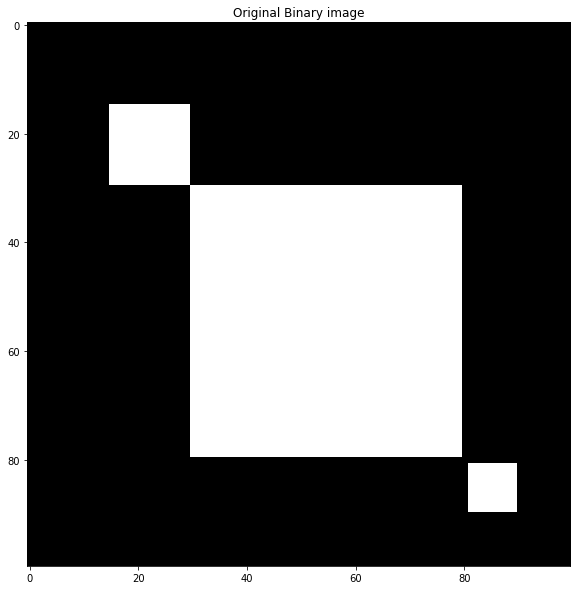

In [16]:
##Create Binary image###
img=np.zeros([100,100])
img[30:80,30:80]=1;
img[15:30,15:30]=1;
img[40:80,40:80]=1;
img[81:90,81:90]=1;
plt.figure(figsize=figsize)
plt.imshow(img,cmap="gray",vmin=0, vmax=1)
plt.title("Original Binary image")
plt.show()

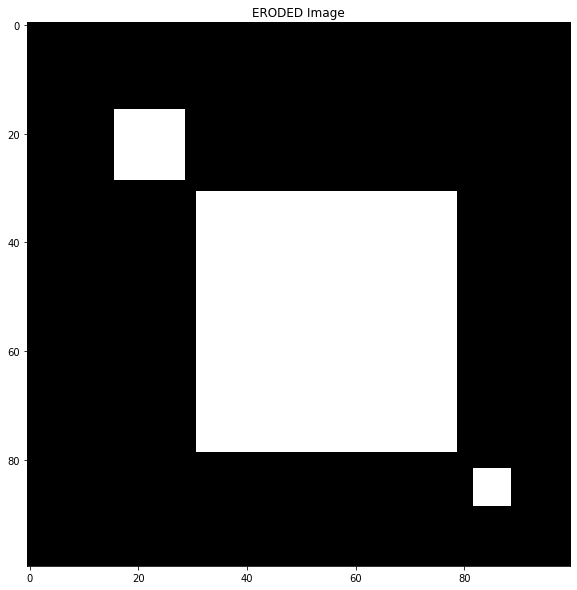

In [17]:
######Erosion Operation######
m=img.shape[0]
n=img.shape[1]
mask=np.array([[1,1,1],[1,1,1],[1,1,1]])
img_new=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=[img[i-1,j-1]*mask[0,0],img[i-1,j]*mask[0,1],img[i-1,j+1]*mask[0,2],
          img[i,j-1]*mask[1,0],img[i,j]*mask[1,1],img[i,j+1]*mask[1,2],
          img[i+1,j-1]*mask[2,0],img[i+1,j]*mask[2,1],img[i+1,j+1]*mask[2,2]]
    img_new[i,j]=min(temp)
plt.figure(figsize=figsize)
plt.imshow(img_new,cmap='gray',vmin=0,vmax=1)
plt.title('ERODED Image')
plt.show()

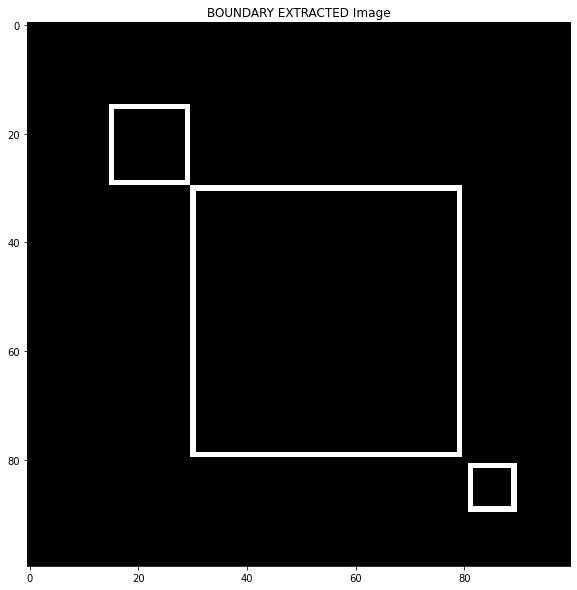

In [18]:
####Boundary Extracted Operation###
B_img=img-img_new
plt.figure(figsize=figsize)
plt.imshow(B_img,cmap='gray',vmin=0,vmax=1)
plt.title('BOUNDARY EXTRACTED Image')
plt.show()

In [12]:
def convolution_erosion(img,mask):
  img_new=np.zeros([m,n])
  for i in range (1,m-1):
    for j in range(1,n-1):
      temp=[img[i-1,j-1]*mask[0,0],img[i-1,j]*mask[0,1],img[i-1,j+1]*mask[0,2],
            img[i,j-1]*mask[1,0],img[i,j]*mask[1,1],img[i,j+1]*mask[1,2]
            ,img[i+1,j-1]*mask[2,0],img[i+1,j]*mask[2,1],img[i+1,j+1]*mask[2,2]]
      img_new[i,j]=min(temp)
  return img_new

In [13]:
#####Plot define#####
def plot(image_to_plot,title):
  img_new=image_to_plot
  comment=title
  plt.figure(figsize=figsize)
  plt.imshow(img_new,cmap="gray",vmin=0, vmax=1)
  plt.title(f"{comment}")
  plt.show()

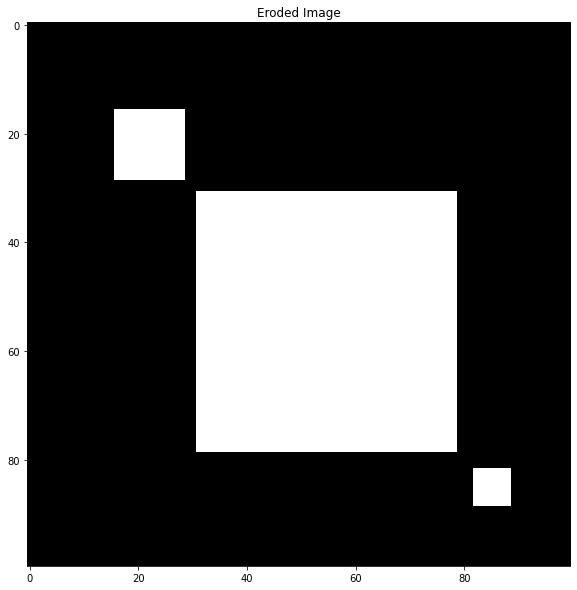

In [14]:
mask_ero=np.array([[1,1,1],[1,1,1],[1,1,1]])
eroded_image=convolution_erosion(img=B_img,mask=mask_ero)
plot(image_to_plot=eroded_image,title="Eroded Image")

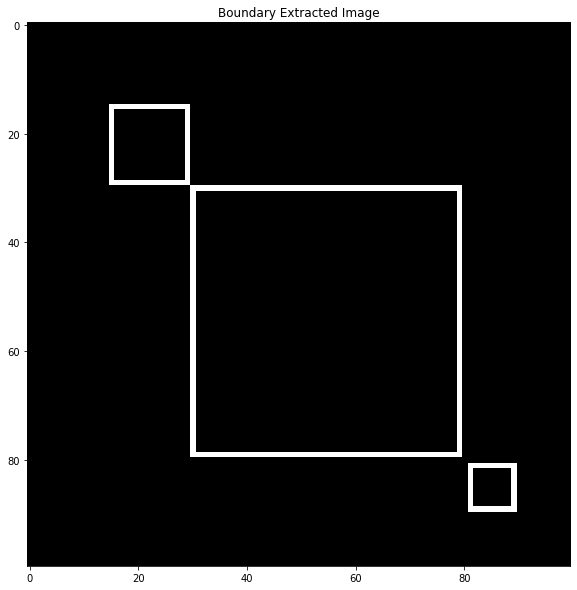

In [15]:
bo_extract=B_img-eroded_image
plot(image_to_plot=bo_extract,title="Boundary Extracted Image")
plt.show()

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf  import colab_pdf
colab_pdf("Boundary Extertion.ipynb")